In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# Data loading

In [90]:
datasetPath = './Data/fer2013.csv'
data = pd.read_csv(datasetPath)

In [91]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [92]:
data.describe()

,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [93]:
# transform each picture to array
X = data[data['Usage'] == 'Training']['pixels']
X = X.apply(lambda x: pd.Series([int(i) for i in x.split()]))
y = data[data['Usage'] == 'Training']['emotion']

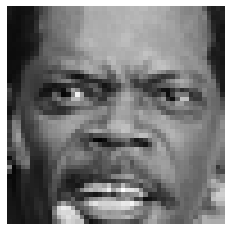

In [94]:
plt.imshow(np.array(X.iloc[10]).reshape(48, 48), cmap='gray')
plt.axis('off')
plt.show()

# PCA

In [95]:
pca_tramsform = PCA()
pca_tramsform.fit(X)
eigenValues = pca_tramsform.explained_variance_

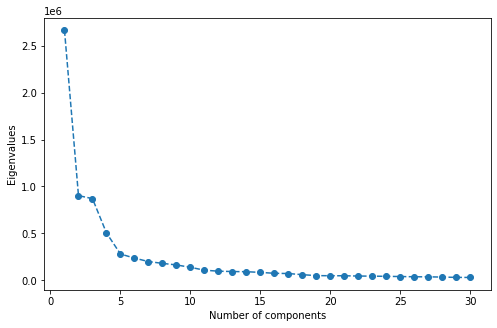

In [96]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 31), eigenValues[0:30], marker='o', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')
plt.show()

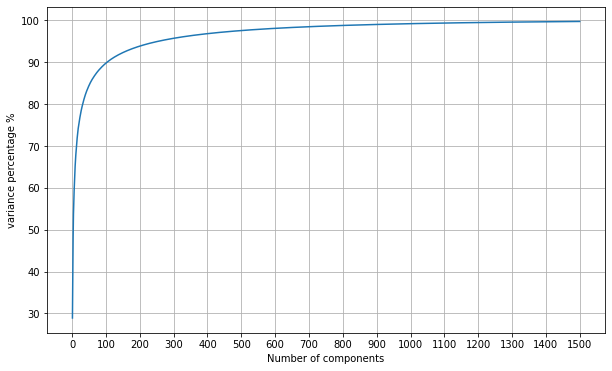

In [97]:
from functools import reduce

n_component = 1500
eigenValues_cdf = [reduce(lambda a, b: a+b, eigenValues[0:i]) for i in range(1, len(eigenValues))]

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_component+1), eigenValues_cdf[:n_component]/eigenValues_cdf[-1] * 100)
plt.xlabel('Number of components')
plt.ylabel('variance percentage %')
plt.xticks(range(0, n_component+1, 100))
plt.grid()
plt.show()

### 5 first and last eigenfaces

In [114]:
pca = PCA()
X_pca = pca.fit_transform(X[y==3])
eigenvalues = pca.explained_variance_
eigenfaces = pca.components_.reshape((len(eigenvalues), 48, 48))

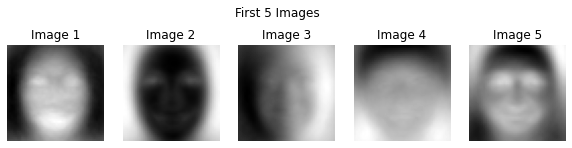

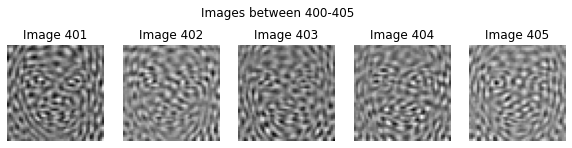

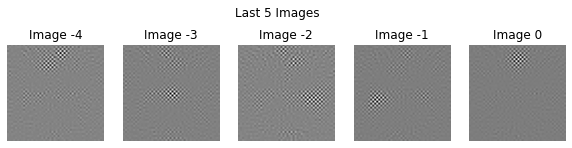

In [122]:
plt.figure(figsize=(10, 2.5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Image {i + 1}')

plt.suptitle('First 5 Images')
plt.show()

plt.figure(figsize=(10, 2.5))
for i in range(400, 405):
    plt.subplot(1, 5, i- 399)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Image {i + 1}')

plt.suptitle('Images between 400-405')
plt.show()


plt.figure(figsize=(10, 2.5))
for i in range(-5, 0):
    plt.subplot(1, 5, i+6)
    plt.imshow(eigenfaces[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Image {i + 1}')

plt.suptitle('Last 5 Images')
plt.show()

# K-Nearest Neighbors classifier

### Before PCA

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

k_values = [1, 2]
resultsBeforePCA = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    resultsBeforePCA[k] = {'CCR': accuracy, 'Confusion Matrix': conf_matrix}

    print(f"Results for k={k}:")
    print(f"  Accuracy (CCR): {accuracy * 100:0.2f}%")
    print("  Confusion Matrix:")
    print(conf_matrix, "\n")

Results for k=1:
  Accuracy (CCR): 37.37%
  Confusion Matrix:
[[215  13  87 141 100  40 203]
 [  9  32   6  12   6   6  16]
 [ 78  12 297 124 118  68 123]
 [131  31 101 586 181  54 359]
 [100  16 100 203 298  46 203]
 [ 36   8  38  93  41 336  82]
 [ 97  18  78 228 135  55 382]] 

Results for k=2:
  Accuracy (CCR): 32.88%
  Confusion Matrix:
[[275  17 119 203  90  28  67]
 [ 13  34   8  15   6   4   7]
 [140  21 320 158 100  42  39]
 [273  59 188 650 133  41  99]
 [189  39 167 261 224  23  63]
 [ 84  18  87 150  63 214  18]
 [176  29 133 324 121  39 171]] 



### After PCA

In [104]:
pca = PCA(n_components= 40)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

k_values = [1, 2]
resultsAfterPCA = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    resultsAfterPCA[k] = {'CCR': accuracy, 'Confusion Matrix': conf_matrix}

    print(f"Results for k={k}:")
    print(f"  Accuracy (CCR): {accuracy * 100:0.2f}%")
    print("  Confusion Matrix:")
    print(conf_matrix, "\n")


Results for k=1:
  Accuracy (CCR): 38.12%
  Confusion Matrix:
[[222  10  88 160 120  44 155]
 [  8  34   6  18   4   5  12]
 [ 82  14 319 132 108  79  86]
 [177  22 118 617 169  66 274]
 [111  15 108 235 288  50 159]
 [ 44   7  49  91  42 351  50]
 [118  16  89 228 121  63 358]] 

Results for k=2:
  Accuracy (CCR): 32.72%
  Confusion Matrix:
[[301  14 127 199  80  35  43]
 [ 18  35  12  14   4   2   2]
 [163  18 348 148  76  44  23]
 [317  50 211 629 126  44  66]
 [218  24 155 296 205  31  37]
 [ 97  15 114 130  50 219   9]
 [199  22 159 313 110  48 142]] 



In [101]:
n_components = np.arange(1, 1500, 15)
accuracies = []

for components in n_components:
    pca = PCA(n_components=components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_pca, y_train)

    y_pred = knn.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

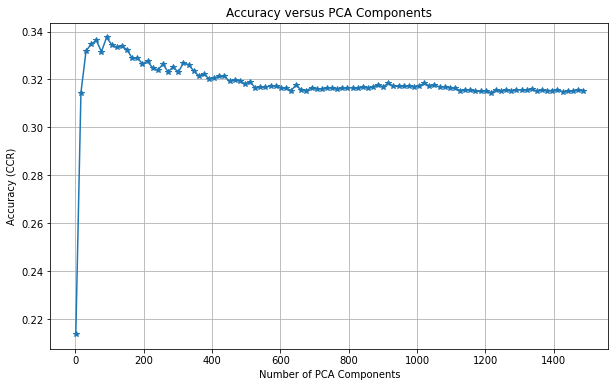

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(n_components, accuracies, marker='*')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy (CCR)')
plt.title('Accuracy versus PCA Components')
plt.grid(True)
plt.show()